In [1]:
from pathlib import Path

import anndata as ad
import scanpy as sc

In [7]:
adata_dict = {}

root = Path("/mnt/raw/datasets/hest1k/st_tissue_specific")
htan_root = Path("/home/ubuntu/SpatialCLIP/data/htan-wustl/st_tissue_specific")

In [8]:
hest_pdac_adata = sc.read_h5ad(root / "visium_human_pancreas.h5ad")
htan_pdac_adata = sc.read_h5ad(htan_root / "htan_visium_human_pancreas.h5ad")

adata_dict = {}
adata_dict["hest_pdac"] = hest_pdac_adata
adata_dict["htan_pdac"] = htan_pdac_adata

combined_adata = ad.concat(
    adata_dict,
    join="inner",
    merge="same",
    uns_merge=None,
    label=None,
    keys=None,
    index_unique=None,
)
combined_adata.layers["counts"] = combined_adata.X.copy()

combined_adata

/mnt/volume/miniforge3/envs/spatialclip/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 70364 × 1370
    obs: 'in_tissue', 'array_row', 'array_col', 'pxl_col_in_fullres', 'pxl_row_in_fullres', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'organ', 'batch'
    var: 'gene_names'
    obsm: 'spatial'
    layers: 'counts'

In [9]:
combined_adata.write("/home/ubuntu/SpatialCLIP/data/hest1k/st_tissue_specific/hest_htan_visium_human_pancreas.h5ad")

In [9]:
uterus_adata.obs["batch"].value_counts()

batch
NCBI812    2605
NCBI813    2027
NCBI690    1960
NCBI811    1894
NCBI820    1561
NCBI573    1547
NCBI574    1505
NCBI691    1383
NCBI821    1375
NCBI575     967
NCBI814     929
NCBI819     918
NCBI816     669
NCBI818     515
NCBI576     470
NCBI815     366
NCBI817     341
Name: count, dtype: int64

### Highly Expressed Genes included when computing Norm

/mnt/volume/miniforge3/envs/spatialclip/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:235: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
/mnt/volume/miniforge3/envs/spatialclip/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/mnt/volume/miniforge3/envs/spatialclip/lib/python3.10/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


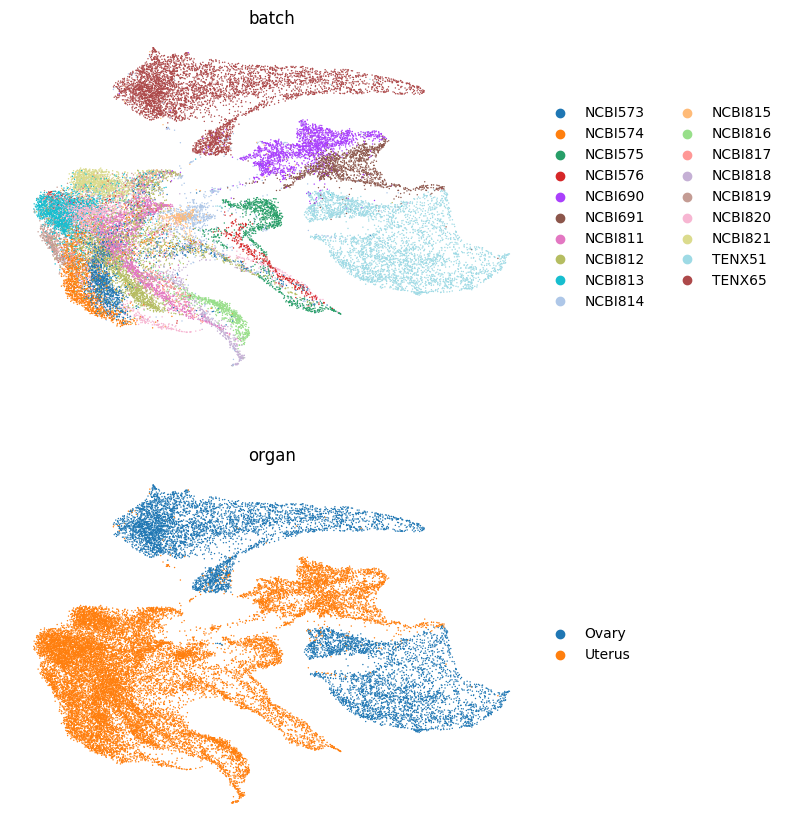

In [25]:
sc.pp.normalize_total(combined_adata, inplace=True, key_added="norm_factor")
sc.pp.subsample(combined_adata, fraction=1.0)

sc.pp.neighbors(combined_adata, n_neighbors=10, use_rep="X")
sc.tl.umap(combined_adata, spread=1.0, min_dist=0.5, random_state=123)
sc.pl.umap(combined_adata, color=["batch", "organ"], ncols=1, frameon=False)

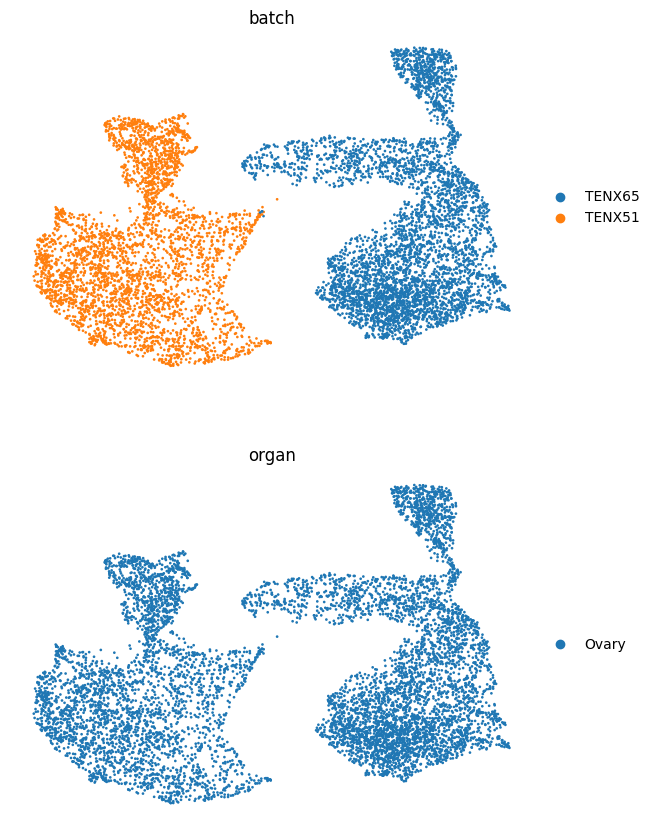

In [26]:
sc.pp.normalize_total(ovary_adata, inplace=True, key_added="norm_factor")
sc.pp.subsample(ovary_adata, fraction=1.0)

sc.pp.neighbors(ovary_adata, n_neighbors=10, use_rep="X")
sc.tl.umap(ovary_adata, spread=1.0, min_dist=0.5, random_state=123)
sc.pl.umap(ovary_adata, color=["batch", "organ"], ncols=1, frameon=False)

/mnt/volume/miniforge3/envs/spatialclip/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:235: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
/mnt/volume/miniforge3/envs/spatialclip/lib/python3.10/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


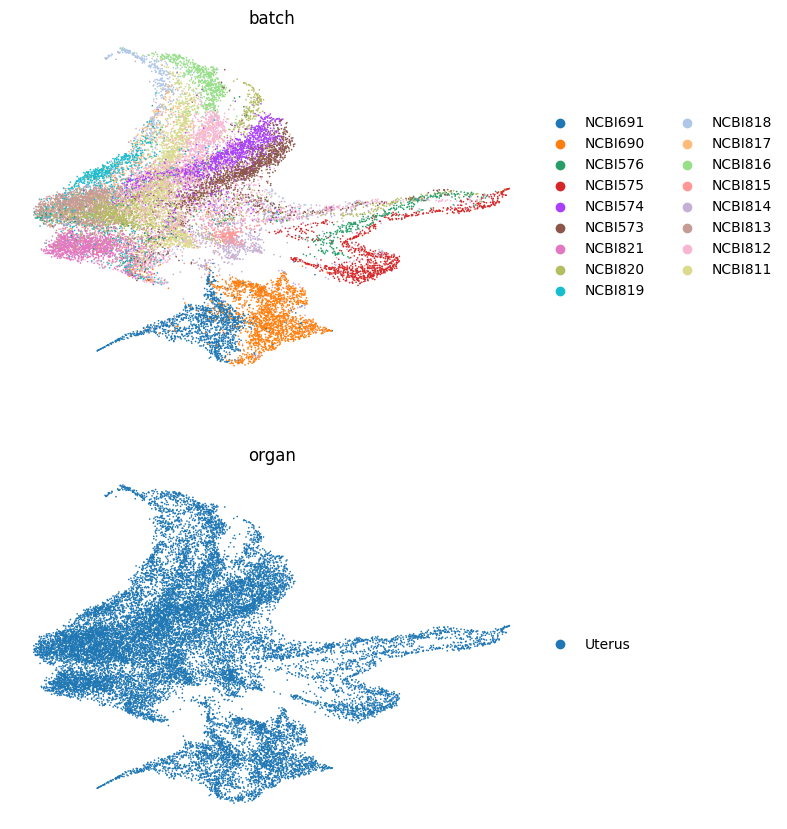

In [27]:
sc.pp.normalize_total(uterus_adata, inplace=True, key_added="norm_factor")
sc.pp.subsample(uterus_adata, fraction=1.0)

sc.pp.neighbors(uterus_adata, n_neighbors=10, use_rep="X")
sc.tl.umap(uterus_adata, spread=1.0, min_dist=0.5, random_state=123)
sc.pl.umap(uterus_adata, color=["batch", "organ"], ncols=1, frameon=False)

### Highly expressed genes excuded when computing Norm

/mnt/volume/miniforge3/envs/spatialclip/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:235: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
/mnt/volume/miniforge3/envs/spatialclip/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/mnt/volume/miniforge3/envs/spatialclip/lib/python3.10/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


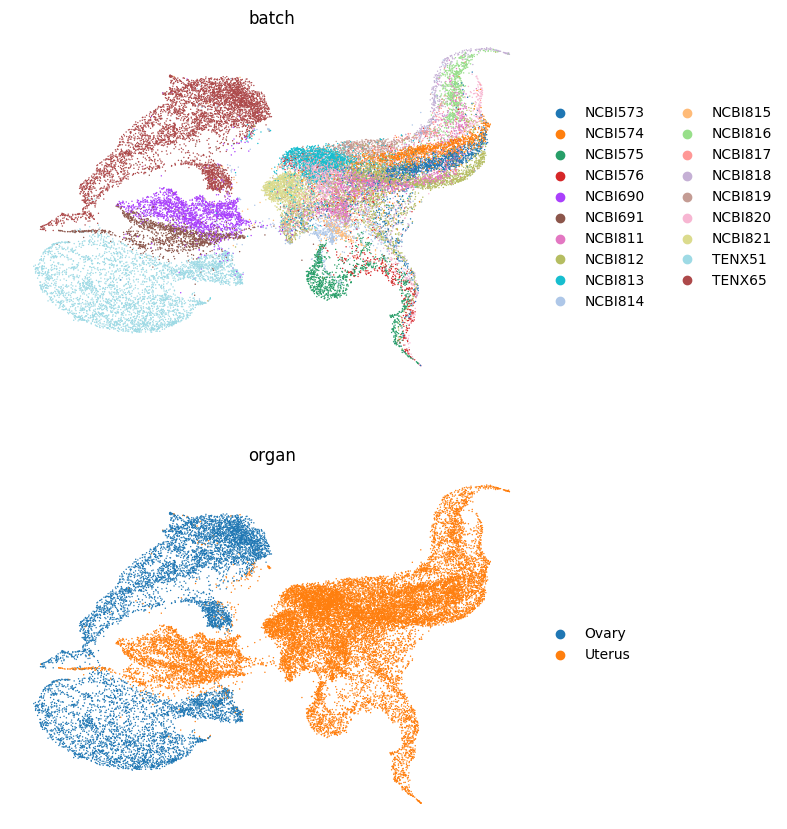

In [28]:
sc.pp.normalize_total(combined_adata, inplace=True, key_added="norm_factor", exclude_highly_expressed=True)
sc.pp.subsample(combined_adata, fraction=1.0)

sc.pp.neighbors(combined_adata, n_neighbors=10, use_rep="X")
sc.tl.umap(combined_adata, spread=1.0, min_dist=0.5, random_state=123)
sc.pl.umap(combined_adata, color=["batch", "organ"], ncols=1, frameon=False)

/mnt/volume/miniforge3/envs/spatialclip/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:235: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


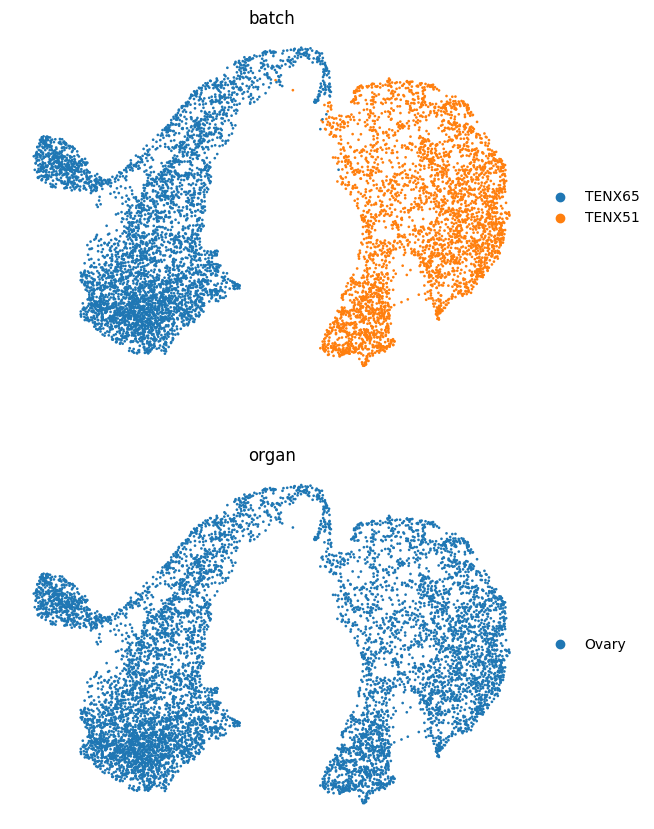

In [29]:
sc.pp.normalize_total(ovary_adata, inplace=True, key_added="norm_factor", exclude_highly_expressed=True)
sc.pp.subsample(ovary_adata, fraction=1.0)

sc.pp.neighbors(ovary_adata, n_neighbors=10, use_rep="X")
sc.tl.umap(ovary_adata, spread=1.0, min_dist=0.5, random_state=123)
sc.pl.umap(ovary_adata, color=["batch", "organ"], ncols=1, frameon=False)

/mnt/volume/miniforge3/envs/spatialclip/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:235: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
/mnt/volume/miniforge3/envs/spatialclip/lib/python3.10/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


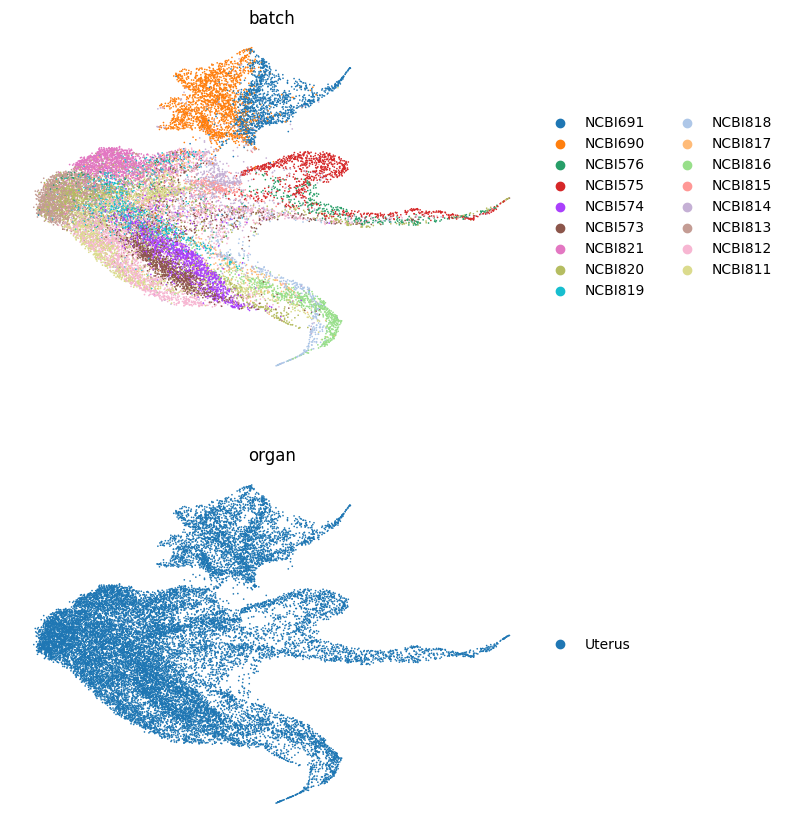

In [30]:
sc.pp.normalize_total(uterus_adata, inplace=True, key_added="norm_factor", exclude_highly_expressed=True)
sc.pp.subsample(uterus_adata, fraction=1.0)

sc.pp.neighbors(uterus_adata, n_neighbors=10, use_rep="X")
sc.tl.umap(uterus_adata, spread=1.0, min_dist=0.5, random_state=123)
sc.pl.umap(uterus_adata, color=["batch", "organ"], ncols=1, frameon=False)